# Simple XTA Simulation Example: field1.dcm

## Simulation Setup

In [6]:
%matplotlib widget
import os, sys

sys.path.append('..')
from xta import xta_sim

#### Setting Astra Path

In [7]:
#Possible generalization for environment dependency path
os.environ['ASTRA_BIN'] = os.getenv('ASTRA_BIN')
#print(os.getenv('ASTRA_BIN'))

In [8]:
#Edit this line to match your path if the above cell doesn't work
#%env ASTRA_BIN=/Users/colinrecker/Desktop/SLACForks/Astra

#### Setting Simulation Directory Path

In [9]:
#Define xta repo path
xta_path = '/Users/colinrecker/Desktop/SLACForks/xta'
os.chdir(xta_path)

#Define simulations directory path
sim_path = '/Users/colinrecker/Google Drive/My Drive/Colin/Simulations'

#Defining vcc laser images path
vcc_path = os.path.join(sim_path, 'inputs', 'laser_mat_images', '*.mat')

fields = []
for i in range(1, 7):
    init_dcm_path = os.path.join(sim_path, 'inputs', 'Fluence Maps Anon', f'Field {i} Anon', f'field{i}.dcm')
    fields.append(xta_sim(xta_path, sim_path, init_dcm_path, vcc_path))

### Generating Initial Electron Distribution

In [10]:
#Configuring distribution settings (distgen.yaml file)
for field in fields:
    field.dist.input['n_particle'] = int(1e4)
    fwhm = 0.06/2.355 # 60 fs = 0.06 ps
    field.dist.input['t_dist']['sigma_t']['value'] = fwhm

    #Generating distribution with first index of laser images
    particles, dist = field.generate_dist(0)

## Run Simulation

### Configure Astra

In [11]:
#Adjusting astra inputs (xta.in file)
for field in fields:
    field.astra.input['newrun']['zstart']=0.0
    field.astra.input['newrun']['zstop'] = 0.25
    field.astra.input['charge']['lspch'] = True
    field.astra.input['newrun']['zphase'] = 50
    field.astra.input['solenoid']['maxb(1)'] = 0.427

### Run continuous scan to specific precision of all tumors

Field 1 optimal value: 0.42703125000000003


FileNotFoundError: [Errno 2] No such file or directory: '/Users/colinrecker/Google Drive/My Drive/Colin/Simulations/field2/plots/laser_images/initial_vs_rotated.jpg'

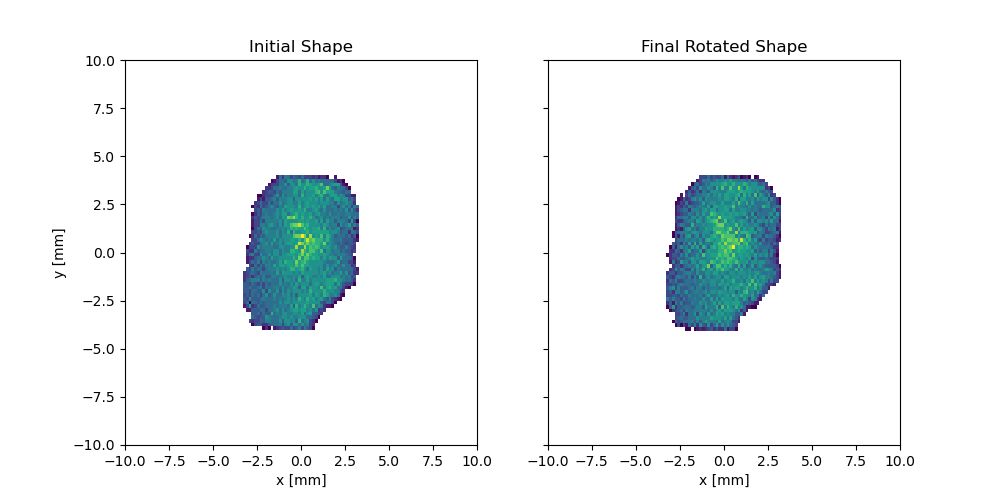

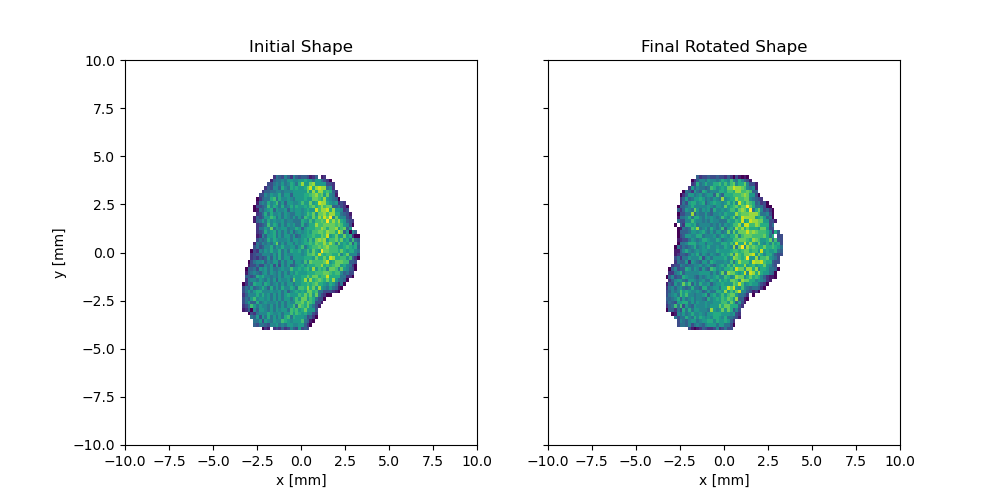

In [12]:
#Scanning
for field in fields:
    field.simulation('cont_scan', ['solenoid', 'maxb(1)'], range=[0.38, 0.45], divisions=5, precision=3)
    field.plot('initial_vs_rotated')
    print(f'Field {fields.index(field)+1} optimal value: {field.opt_val}')

#Archive simulation with desired .h5 file name
for field in fields:
    field.archive(f'B={field.astra.input["solenoid"]["maxb(1)"]}')

## Plots

### Laser Image Plots

### Single Electron Distribution Plots

#### Initial Electron Distribution

#### Final Electron Distribution

### Comparative Electron Distribution Plots

#### Initial vs. Final Distribution

#### Cross Sectional Distributions

#### Initial vs. Rotated Final Distribution

### Movie

### Energy Plots